In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
mnist_train = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=False, download=True, transform=transforms.ToTensor())

In [3]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False, num_workers=2)

In [4]:
num_inputs,num_outputs,num_hiddens=784,10,256
W1=torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_inputs)),dtype=torch.float)
b1=torch.zeros(num_hiddens,dtype=torch.float)
W2=torch.tensor(np.random.normal(0,0.01,(num_outputs,num_hiddens)),dtype=torch.float)
b2=torch.zeros(num_outputs,dtype=torch.float)
params=[W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [5]:
def relu(X):
    return torch.max(input=X,other=torch.tensor(0.0))

In [6]:
import torch.nn as nn
loss = nn.CrossEntropyLoss()

In [7]:
def SGD(params,lr):
    for param in params:
        param.data-=lr*param.grad

In [8]:
def net(X):
    X=X.view((-1,num_inputs))
    H=relu(torch.matmul(X,W1.t())+b1)
    return torch.matmul(H,W2.t())+b2

In [12]:
def evaluate_accuracy(data_iter,net,loss):
    acc_sum,n=0.0,0
    test_l_sum=0.0
    for X,y in data_iter:       
        acc_sum+=(net(X).argmax(dim=1)==y).float().sum().item()
        l=loss(net(X),y).sum()
        test_l_sum+=l.item()
        n+=y.shape[0]
    return acc_sum/n,test_l_sum/n

In [15]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n=0.0,0.0,0
        for X,y in train_iter:
            y_hat = net(X)
            l=loss(y_hat,y).sum()
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                SGD(params,lr)
            else:
                optimizer.step()
            train_l_sum+=l.item()
            train_acc_sum+=(y_hat.argmax(dim=1)==y).sum().item()
            n+=y.shape[0]
        test_acc,test_l = evaluate_accuracy(test_iter,net,loss)
        train_loss.append(train_l_sum/n)
        test_loss.append(test_l)
        print('epoch%d,loss%.4f,train acc %3f,test acc %.3f'%(epoch+1,train_l_sum/n,train_acc_sum/n,test_acc))
    return train_loss,test_loss

In [16]:
num_epochs=20
lr=0.1
train_loss,test_loss=train(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch1,loss0.0015,train acc 0.894900,test acc 0.909
epoch2,loss0.0013,train acc 0.908267,test acc 0.919
epoch3,loss0.0011,train acc 0.917983,test acc 0.926
epoch4,loss0.0010,train acc 0.924683,test acc 0.930
epoch5,loss0.0009,train acc 0.932083,test acc 0.937
epoch6,loss0.0009,train acc 0.937500,test acc 0.938
epoch7,loss0.0008,train acc 0.942583,test acc 0.943
epoch8,loss0.0008,train acc 0.945917,test acc 0.947
epoch9,loss0.0007,train acc 0.949617,test acc 0.950
epoch10,loss0.0007,train acc 0.953283,test acc 0.953
epoch11,loss0.0006,train acc 0.955600,test acc 0.956
epoch12,loss0.0006,train acc 0.958583,test acc 0.957
epoch13,loss0.0006,train acc 0.960783,test acc 0.958
epoch14,loss0.0005,train acc 0.963267,test acc 0.961
epoch15,loss0.0005,train acc 0.965333,test acc 0.962
epoch16,loss0.0005,train acc 0.966817,test acc 0.964
epoch17,loss0.0004,train acc 0.968650,test acc 0.965
epoch18,loss0.0004,train acc 0.970567,test acc 0.965
epoch19,loss0.0004,train acc 0.971883,test acc 0.969
ep

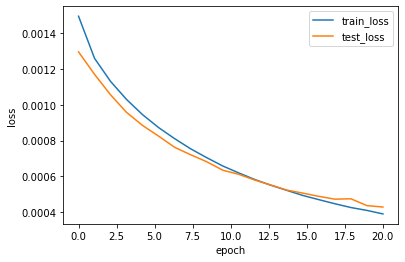

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()